MATMUL vs MATADD PERFORMANCE

In [46]:
n=5000
a=rand(n,n)
b=rand(n,n)
flops = 2n^3
t = @elapsed(a*b)
gigaflop_rate = round(1e-9*flops/t)
println("gigaflops: $gigaflop_rate")

gigaflops: 43.0


In [2]:
blas_set_num_threads(1)

In [3]:
n=5000
a=randn(n,n)
b=randn(n,n)
flops = 2n^3
t = @elapsed(a*b)
gigaflop_rate = round(1e-9*flops/t)
println("gigaflops: $gigaflop_rate")

gigaflops: 44.0


In [43]:
n=5000
a=randn(n,n)
b=randn(n,n)
flops = n^2
t = @elapsed(a+b)
megaflop_rate = round(1e-6*flops/t)
println("megaflops: $megaflop_rate")

megaflops: 219.0


In [36]:
addprocs(10)

10-element Array{Any,1}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11

In [33]:
pmap(x->x^2, [rand(2,2) for i=1:3])

# pmap will move data to slave processors, compute, 
# and return result to master

3-element Array{Any,1}:
 2x2 Array{Float64,2}:
 0.0839819  0.318332
 0.043669   0.193708
 2x2 Array{Float64,2}:
 1.05731   0.64942 
 0.944766  0.606432  
 2x2 Array{Float64,2}:
 0.317092  0.20327 
 0.583208  0.374016  

Pmap

In [3]:
M=[1:4]
println(nprocs())
println(@elapsed map(x->trace(randn(3000,3000)^2),M))
println(@elapsed pmap(x->trace(randn(3000,3000)^2),M))

1
1.858249788
1.995287841


In [4]:
addprocs(1)
M=[1:4]
println(nprocs())
println(@elapsed map(x->trace(randn(3000,3000)^2),M))
println(@elapsed pmap(x->trace(randn(3000,3000)^2),M))

2
5.49760436
5.943525752


In [5]:
addprocs(1)
M=[1:4]
println(nprocs())
println(@elapsed map(x->trace(randn(3000,3000)^2),M))
println(@elapsed pmap(x->trace(randn(3000,3000)^2),M))

3
5.448011708
3.289091613


In [6]:
addprocs(1)
M=[1:4]
println(nprocs())
println(@elapsed map(x->trace(randn(3000,3000)^2),M))
println(@elapsed pmap(x->trace(randn(3000,3000)^2),M))

4
5.528438105
2.670215622


In [7]:
addprocs(1)
M=[1:4]
println(nprocs())
println(@elapsed map(x->trace(randn(3000,3000)^2),M))
println(@elapsed pmap(x->trace(randn(3000,3000)^2),M))

5
5.459724571
2.105152804


In [8]:
addprocs(1)
M=[1:4]
println(nprocs())
println(@elapsed map(x->trace(randn(3000,3000)^2),M))
println(@elapsed pmap(x->trace(randn(3000,3000)^2),M))

6
5.466747892
1.70041078


In [9]:
addprocs(1)
M=[1:4]
println(nprocs())
println(@elapsed map(x->trace(randn(3000,3000)^2),M))
println(@elapsed pmap(x->trace(randn(3000,3000)^2),M))

7
5.476626658
1.644184916


In [10]:
addprocs(1)
M=[1:4]
println(nprocs())
println(@elapsed map(x->trace(randn(3000,3000)^2),M))
println(@elapsed pmap(x->trace(randn(3000,3000)^2),M))

8
5.419013324
1.570199808


Load Balancing Issues

In [11]:
addprocs(1)
M=[1:4]
println(nprocs())
println(@elapsed map(x->trace(randn(3000,3000)^2),M))
println(@elapsed pmap(x->trace(randn(3000,3000)^2),M))


9
5.484140186
1.546762317


In [12]:
addprocs(1)
M=[1:4]
println(nprocs())
println(@elapsed map(x->trace(randn(3000,3000)^2),M))
println(@elapsed pmap(x->trace(randn(3000,3000)^2),M))

10
5.492179415
1.553011727


In [13]:
addprocs(1)
M=[1:11]
println(nprocs())
println(@elapsed map(x->trace(randn(3000,3000)^2),M))
println(@elapsed pmap(x->trace(randn(3000,3000)^2),M))

11
14.85471524
5.866342781


In [90]:
n=1
println(@elapsed z=sum(map(isprime,n:(n+99_999))))
z

0.08711067


9592

In [93]:
n=20_000_000_000
println(@elapsed z=sum(map(isprime,n:(n+99_999))))
z

0.293217393


4271

In [94]:
n=1
println(@elapsed z=sum(pmap(isprime,n:(n+99_999))))
z

3.911008466


9592

In [77]:
addprocs(1)

1-element Array{Any,1}:
 2

In [79]:
n=1
@elapsed pmap(isprime,n:(n+99_999))

6.885005462

In [80]:
addprocs(1)

1-element Array{Any,1}:
 3

In [81]:
n=1
@elapsed pmap(isprime,n:(n+99_999))

4.4397497

In [82]:
addprocs(1)

1-element Array{Any,1}:
 4

In [84]:
n=1
@elapsed pmap(isprime,n:(n+99_999))

3.930645957

In [1]:
for i=1:20
M=[randn(3000,3000) for i=1:4]
    println("$(nprocs()) procs")
    println("map: $(@elapsed map(x->x^2,M))")
    println("pmap: $(@elapsed pmap(x->x^2,M))")
addprocs(1)
end

1 procs
map: 1.763850404
pmap: 1.615324815
2 procs
map: 4.867472913
pmap: 6.51748529
3 procs
map: 4.884340068
pmap: 3.716198169
4 procs
map: 4.914618213
pmap: 3.255792087
5 procs
map: 4.961000871
pmap: 2.802611609
6 procs
map: 5.079390311
pmap: 2.218753823
7 procs
map: 5.366473794
pmap: 2.675273002
8 procs
map: 5.348668754
pmap: 2.365349352
9 procs
map: 5.15110838
pmap: 2.529358085
10 procs
map: 5.276885994
pmap: 2.391194826
11 procs
map: 5.223200457
pmap: 2.871376969
12 procs
map: 5.328486006
pmap: 4.030911674
13 procs
map: 5.743054924
pmap: 4.86021622
14 procs
map: 5.26905023
pmap: 3.337954228
15 procs
map: 5.283601936
pmap: 3.838917668
16 procs
map: 5.263000683
pmap: 4.476909547
17 procs
map: 5.287817566
pmap: 3.87444807
18 procs
map: 5.247974486
pmap: 3.630788179
19 procs
map: 5.163839933
pmap: 3.761109441
20 procs
map: 5.042753846
pmap: 3.534660316


In [1]:

k=8
M=[i for i=1:4]

 v=zeros(k)
println("map: $(@elapsed map(x->trace(randn(5000,5000)^2),M))")
for i=1:k
   

    println("$(nprocs()) procs")
    
    v[i]= @elapsed pmap(x->trace(randn(5000,5000)^2),M)
    println(v[1:i])
addprocs(1)
end

map: 10.778124747
1 procs
[11.164013702]
2 procs
[11.164013702,28.022523173]
3 procs
[11.164013702,28.022523173,18.515644434]
4 procs
[11.164013702,28.022523173,18.515644434,16.315931278]
5 procs
[11.164013702,28.022523173,18.515644434,16.315931278,11.463118751]
6 procs
[11.164013702,28.022523173,18.515644434,16.315931278,11.463118751,10.647415384]
7 procs
[11.164013702,28.022523173,18.515644434,16.315931278,11.463118751,10.647415384,11.332975942]
8 procs
[11.164013702,28.022523173,18.515644434,16.315931278,11.463118751,10.647415384,11.332975942,10.465631834]


In [4]:
 versioninfo()

Julia Version 0.3.11
Commit 483dbf5* (2015-07-27 06:18 UTC)
Platform Info:
  System: Darwin (x86_64-apple-darwin13.4.0)
  CPU: Intel(R) Core(TM) i7-4870HQ CPU @ 2.50GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: libopenblas
  LIBM: libopenlibm
  LLVM: libLLVM-3.3


In [6]:
cpu = Sys.cpu_info()
@which Sys.cpu_info()

cpu_info() at sysinfo.jl:114

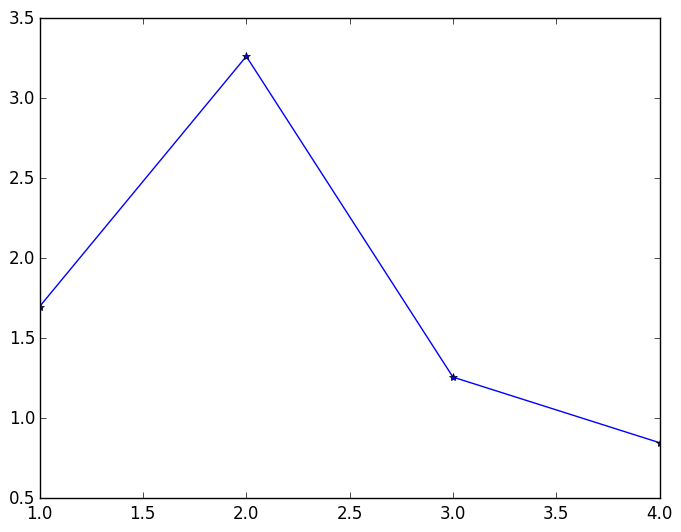

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x128779390>

In [6]:
plot(1:4,v[1:4]./(1:4),"-*")

In [7]:
v[2]


6.526469651

In [8]:
v[3]

3.775014799

In [9]:
v./v[2]

20-element Array{Float64,1}:
 0.260406
 1.0     
 0.578416
 0.519858
 0.388064
 0.333194
 0.32103 
 0.31598 
 0.342792
 0.34319 
 0.338682
 0.397269
 0.377011
 0.442986
 0.554403
 0.395519
 0.712008
 0.675136
 0.501528
 0.41159 

In [1]:
6000^2 * 8 /1e9

0.288

In [2]:
trace(randn(3,3))

2.425073745540917

In [3]:
?trace

INFO: Loading help data...


Base.trace(M)

   Matrix trace


In [9]:
@time map(x->trace(randn(1000,1000)^2),[1])

elapsed time: 0.068225313 seconds (16008732 bytes allocated)


1-element Array{Float64,1}:
 2281.01

In [10]:
blas_set_num_threads(1)

In [10]:
@time map(x->trace(randn(4000,4000)^2),[1])

elapsed time: 1.131164442 seconds (256001848 bytes allocated, 6.12% gc time)


1-element Array{Float64,1}:
 3388.62

In [12]:
blas_set_num_threads(1)
@time map(x->trace(randn(4000,4000)^2),[1])

elapsed time: 3.328273807 seconds (256001848 bytes allocated, 2.13% gc time)


1-element Array{Float64,1}:
 5339.54

In [21]:
blas_set_num_threads(5)
@time map(x->trace(randn(4000,4000)^2),[1])

elapsed time: 1.296925195 seconds (256001848 bytes allocated, 5.89% gc time)


1-element Array{Float64,1}:
 3828.88

In [8]:
CPU_CORES

8

In [35]:
CPU_CORES

8

In [8]:
using DataFrames

In [9]:
top = readtable("TOP500_201506.csv");

In [14]:
maximum(top[:Nmax])

11870208

In [16]:
log10(12000000^2*64)

15.964542466079136

In [22]:
N=12000000.0
(2.0/3*N^3)/(33*1e15)

34909.09090909091

In [24]:
(34909)/60/60

9.696944444444446

In [30]:
maximum(top[:Nmax])

11870208

spawn

In [24]:
r =@spawn  rand(5,5)

RemoteRef(8,1,72)

In [17]:
nprocs()

11

In [15]:
fetch(s)

3x3 Array{Float64,2}:
 0.831973  0.406154  0.769586
 0.894275  0.105545  0.788304
 0.628602  0.695253  0.659806

In [16]:
s[1,2]

0.40615446804136446

In [37]:
fetch(u)

3x3 Array{Float64,2}:
 0.398896  0.399194  0.81355 
 0.763833  0.214127  0.768526
 0.62143   0.567665  0.626706

In [38]:
u[1,1]

0.3988956202522269

In [5]:
versioninfo()

Julia Version 0.3.11
Commit 483dbf5* (2015-07-27 06:18 UTC)
Platform Info:
  System: Darwin (x86_64-apple-darwin13.4.0)
  CPU: Intel(R) Core(TM) i7-4870HQ CPU @ 2.50GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: libopenblas
  LIBM: libopenlibm
  LLVM: libLLVM-3.3
